# WeatherPy

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto santa
Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | balkanabat
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | sao joaquim
Processing Record 9 of Set 1 | cadale
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | luau
Processing Record 12 of Set 1 | selfoss
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | najran
Processing Record 15 of Set 1 | saurimo
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | papao
Processing Record 18 of Set 1 | toga village
City not found. Skipping...
Processing Record 19 of Set 1 | norfolk
Processing Record 20 of Set 1 | kayangel
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | ava

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

#file_path= "../output/city_details.csv"

city_data_df.to_csv("output/city_details.csv")

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Windspeed     560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,puerto santa,-8.9906,-78.6456,64.02,80,91,9.08,PE,1723302598
1,bubaque,11.2833,-15.8333,78.84,87,100,20.24,GW,1723302598
2,port-aux-francais,-49.3500,70.2167,35.65,70,91,13.78,TF,1723302598
3,atafu village,-8.5421,-172.5159,82.20,78,61,17.54,TK,1723302599
4,balkanabat,39.5108,54.3671,100.89,23,0,4.63,TM,1723302599


#### Latitude Vs. Temperature

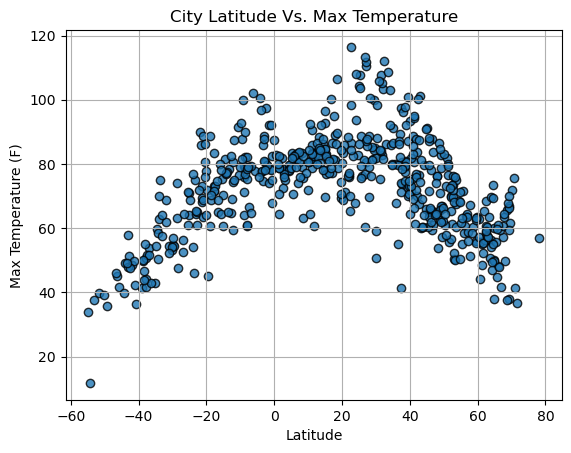

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

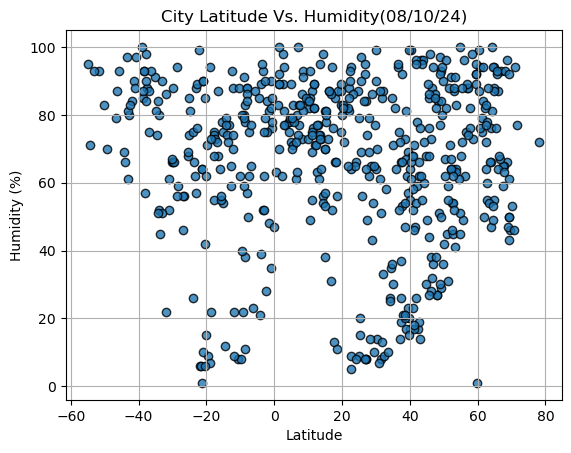

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

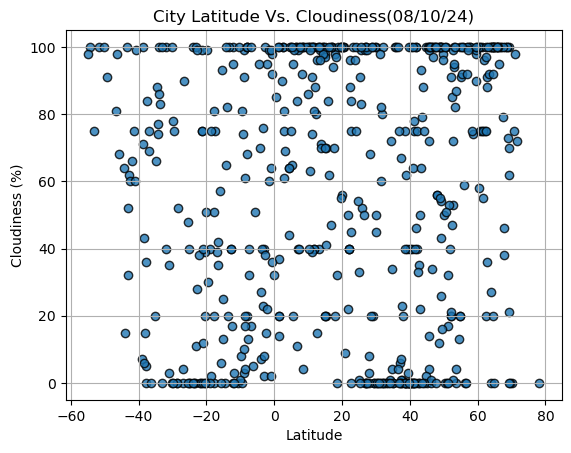

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

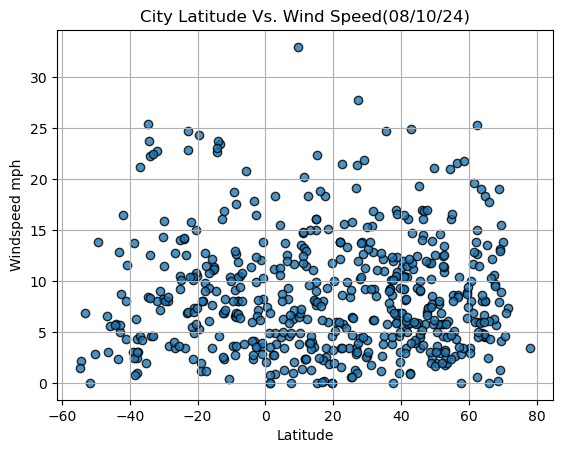

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
  

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,bubaque,11.2833,-15.8333,78.84,87,100,20.24,GW,1723302598
4,balkanabat,39.5108,54.3671,100.89,23,0,4.63,TM,1723302599
5,sisimiut,66.9395,-53.6735,41.67,93,100,12.19,GL,1723302599
8,cadale,2.7603,46.3222,77.90,81,81,18.37,SO,1723302599
9,wailua homesteads,22.0669,-159.3780,75.99,88,40,13.80,US,1723302599


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,puerto santa,-8.9906,-78.6456,64.02,80,91,9.08,PE,1723302598
2,port-aux-francais,-49.3500,70.2167,35.65,70,91,13.78,TF,1723302598
3,atafu village,-8.5421,-172.5159,82.20,78,61,17.54,TK,1723302599
6,blackmans bay,-43.0167,147.3167,57.72,61,32,5.01,AU,1723302599
7,sao joaquim,-28.2939,-49.9317,47.73,59,52,3.58,BR,1723302599


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.5774406146347902


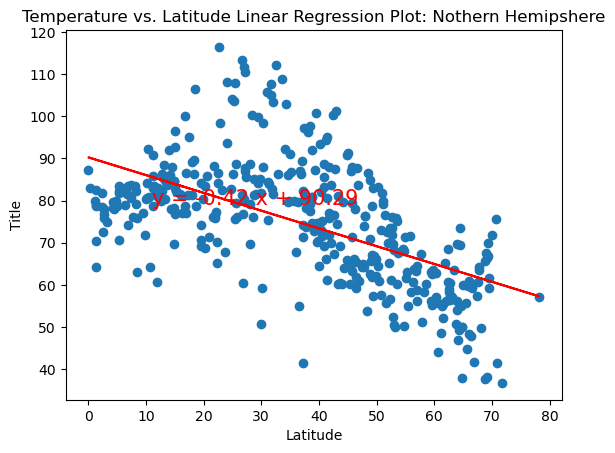

<Figure size 20000x20000 with 0 Axes>

In [56]:
# Linear regression on Northern Hemisphere
# I need the equation to show up on the graph and in the function defined above, it had the output for it but for some reason it's
#its not showing. But for one of the grapns below (scroll down) it has come up! I'm not able to figure kut why

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.title("Temperature vs. Latitude Linear Regression Plot: Nothern Hemipshere")
plot_linear_regression(x_values,y_values, 'Max Temp',(11,79))

plt.figure(figsize=(200,200))

plt.savefig("output/Fig5.png")

plt.show()

The r-squared is: 0.8277505403934119


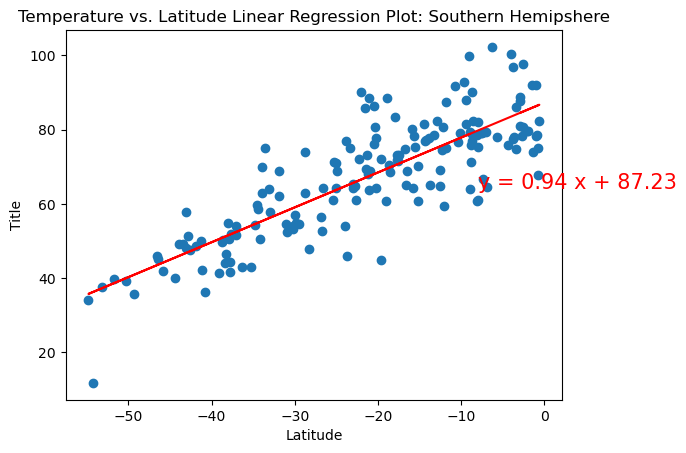

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.title("Temperature vs. Latitude Linear Regression Plot: Southern Hemipshere")
plot_linear_regression(x_values,y_values, 'Max Temp', (-8,64))

plt.savefig("output/Fig6.png")

plt.show()

**Discussion about the linear relationship:** In the first scatter plot, there is a negative linear relationship between the latitude and the temperature with the slope of the line being 0,42. This tells us that as the latitude increases, the temperature decreases. However, in the second graph, there is a positive linear relationship between the latitude and the temperature with the slope being 0.94 indicating that as the latitude increases, the temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.06140360221239959


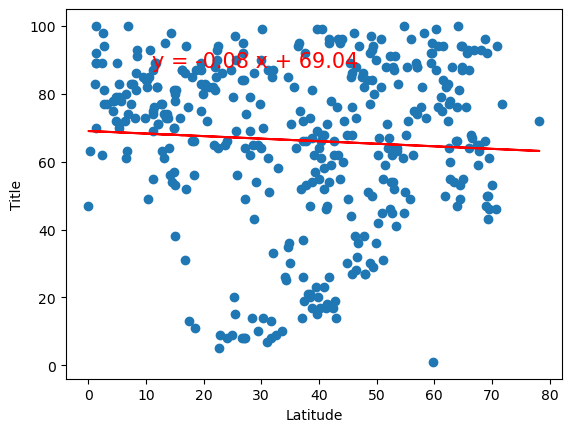

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (11,88))

plt.savefig("output/Fig7.png")

plt.show()

The r-squared is: -0.23625136390810167


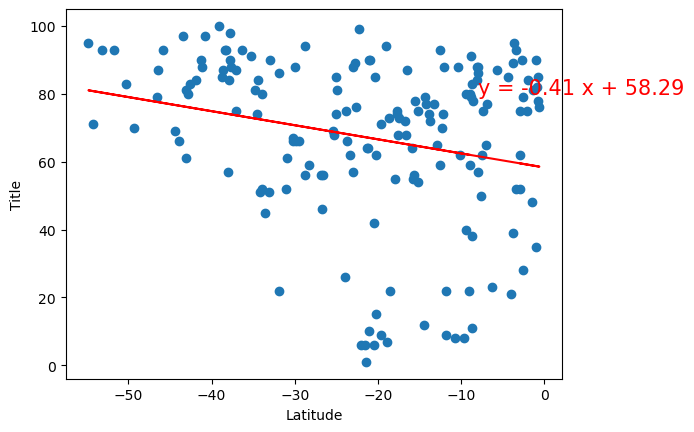

<Figure size 20000x20000 with 0 Axes>

In [58]:
#Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-8,80))

plt.figure(figsize=(200,200))

plt.savefig("output/Fig8.png")

plt.show()

**Discussion about the linear relationship:** Both the nothern and southern hemisphere have a weak negative relationship between the latitude and the Humidity. The slope of the line in the nothern hemisphere is 0.08, whereas, the slope of the line in the southern hemisphere is 0.41 which is stronger when compared to the other. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.03046540188755247


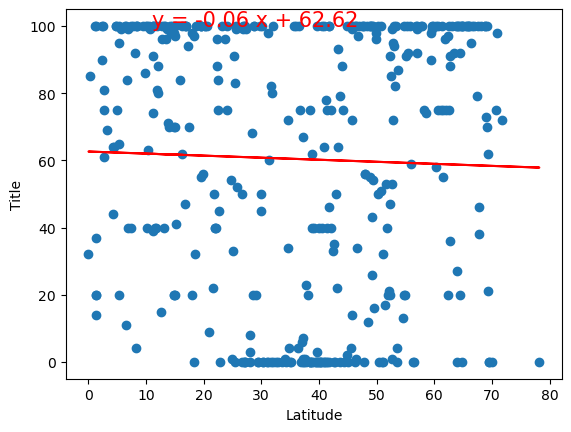

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (11,100))

plt.savefig("output/Fig9.png")

plt.show()

The r-squared is: -0.15107341133819105


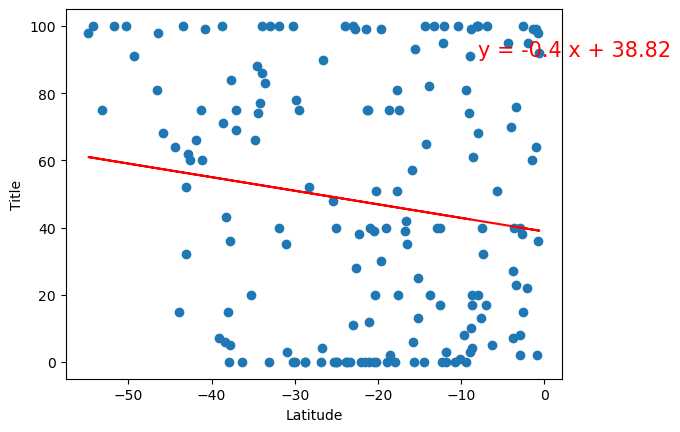

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-8,91))

plt.savefig("output/Fig10.png")

plt.show()

**Discussion about the linear relationship:** Both the nothern and the southern hemispheres have a very weak negation linear relationship between the latitude and the cloudiness with their slopes being 0.6 and 0.4 respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05202323249130975


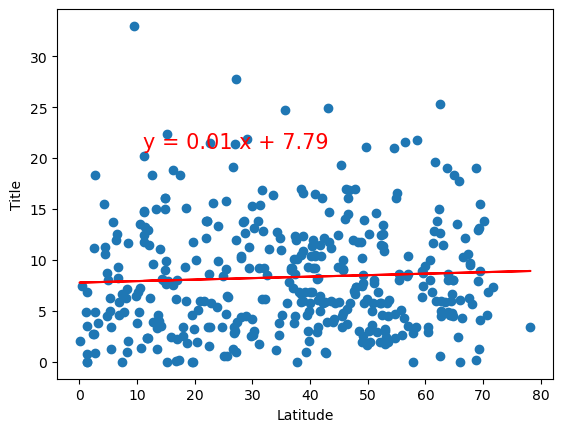

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (11,21))

plt.savefig("output/Fig11.png")

plt.show()

The r-squared is: 0.09188825350385037


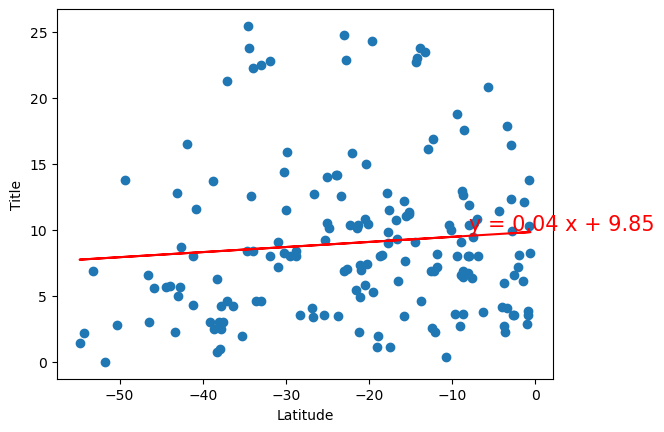

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-8,10))

plt.savefig("output/Fig12.png")

plt.show()


**Discussion about the linear relationship:** The Scope of the line in the Nothern Hemisphere is 0.1 which indicates avery slight positive relationship between the latitude and the windspeed. However, in the second scatter plot, the slope on the line is 0.4 which also indicates a slight positive relationship. Considering how slight the slope is, it can be said the relationship is not very strong between the latitude and the windspeed in both the hemispheres. Other factors should be considered to come to a more comprehensive analysis.